# An Introduction to Copula Modelling

## Sklar's Theorem

Every multivariate cumulative distribution function can be expressed using only the marginals.

<p style= "text-align:center"> $H(x_1, ..., x_d) = P[X_1 \leq x_1, ..., X_d \leq x_d]$</p>

A random vector $(X_1, X_2, ..., X_d)$ can be expressed using only the marginals:

<p style="text-align:center"> $F_i(x) = P[X_i \leq x]$</p>

<p style="text-align:center"> $H(x_1, ..., x_d) = C[F_i(x_1, ..., F_d(x_d)]$</p>

<p style="text-align:center"> $f(x_1, ..., x_d) = c[(F_1)x_1, ..., F_d(x_d)] * f_1(x_1), ..., f_d(x_d)$</p>

$C=$ copula

$f=$ density function

$c=$ density of the copula

## Scatterplots of random draws from some standard copulas

**Purpose:** to study the type of relationships generated by normal and t-copulas. For each, we generate random bivariate draws from the copula and consider their scatterplots to evaluate the dependence.


## 1. Normal Copula

### with $\rho = 0$

In [2]:
library(copula)
# The term in the brackets is the correlation rho
norm.cop <- normalCopula(0.0)
u0 = rCopula(200, norm.cop)
norm.cop
head(u0)

Normal copula, dim. d = 2 
Dimension:  2 
Parameters:
  rho.1   = 0

0.03626404,0.52612975
0.20994712,0.65809045
0.63196875,0.76157963
0.92194458,0.25442176
0.66188657,0.03722071
0.65281203,0.89814299


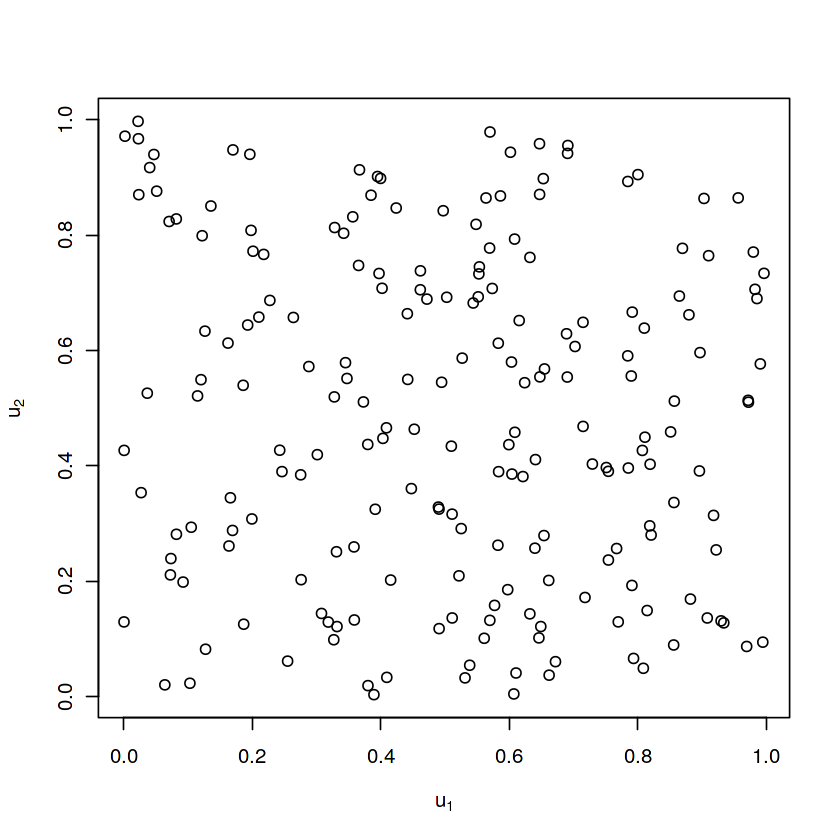

In [3]:
plot(u0, xlab=expression(u[1]), ylab=expression(u[2]))

Given there is no correlation in this normal copula, the random draws are unrelated and uniform and seem to fill the unit square with no evident relationship.

### with $\rho = 0.5$

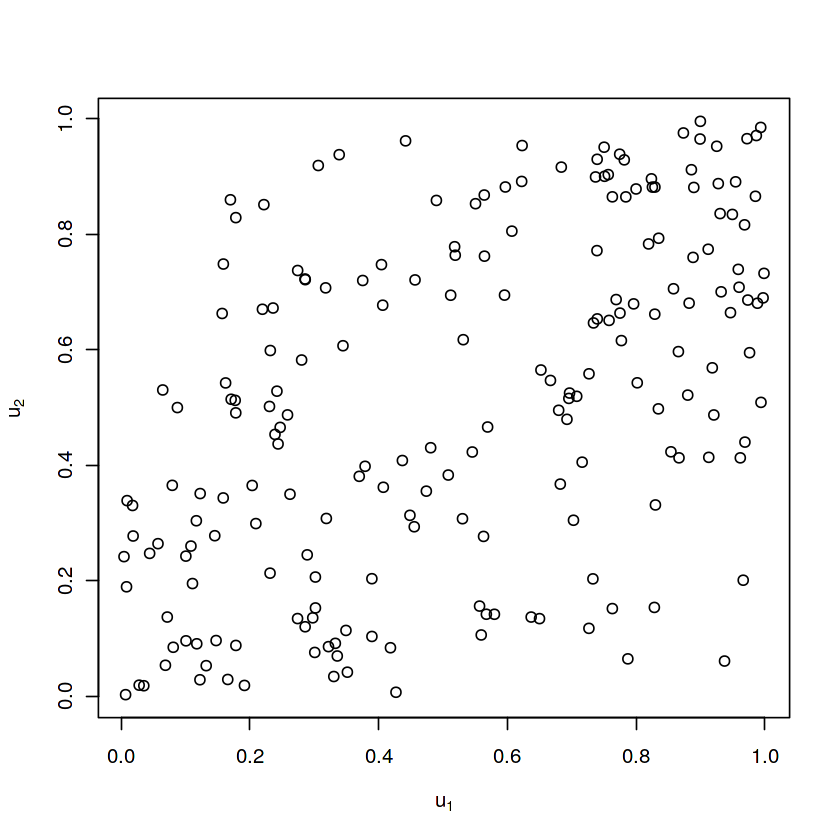

In [4]:
norm.cop <- normalCopula(0.5)
u0 <- rCopula(200, norm.cop)
plot(u0, xlab=expression(u[1]), ylab=expression(u[2]))

Using a correlation of 0.5, we begin to see a positive dependency.
N.B. each $U$ is still individually uniformly distributed, jointly, the points are closer to the positive diagonal.

### with $\rho = -0.95$

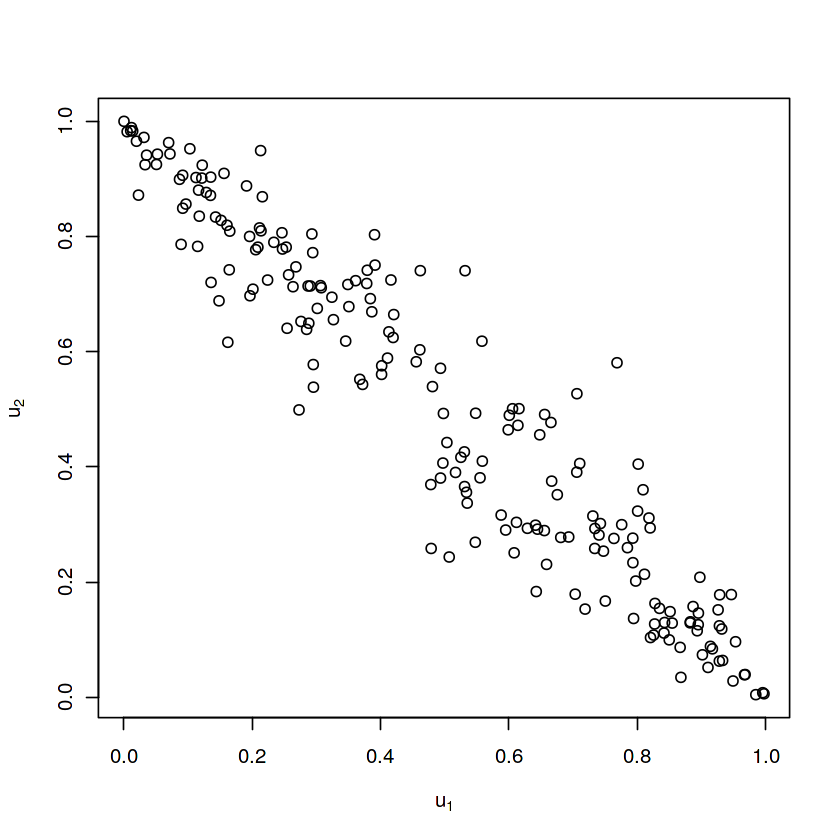

In [6]:
norm.cop <- normalCopula(-0.95)
u0 <- rCopula(200, norm.cop)
plot(u0, xlab = expression(u[1]), ylab = expression(u[2]))

When we usa a normal copula with a strong negative corerlation we see that there is a clear negative tendency, i.e. the points are clustered around the negative diagonal. We can also see the elliptical nature of the distribution: both extreme ends of the distribution suggest tail dependencies: when $u_1$ is very low, $u_2$ tends to be very high and viceversa.

## 2. T-Copula 

In the T-Copula, we want to show the impact of the degree of freedom/tail index, so we do two draws with same high correlation but very fat tail index.

### 100 Degrees of Freedom

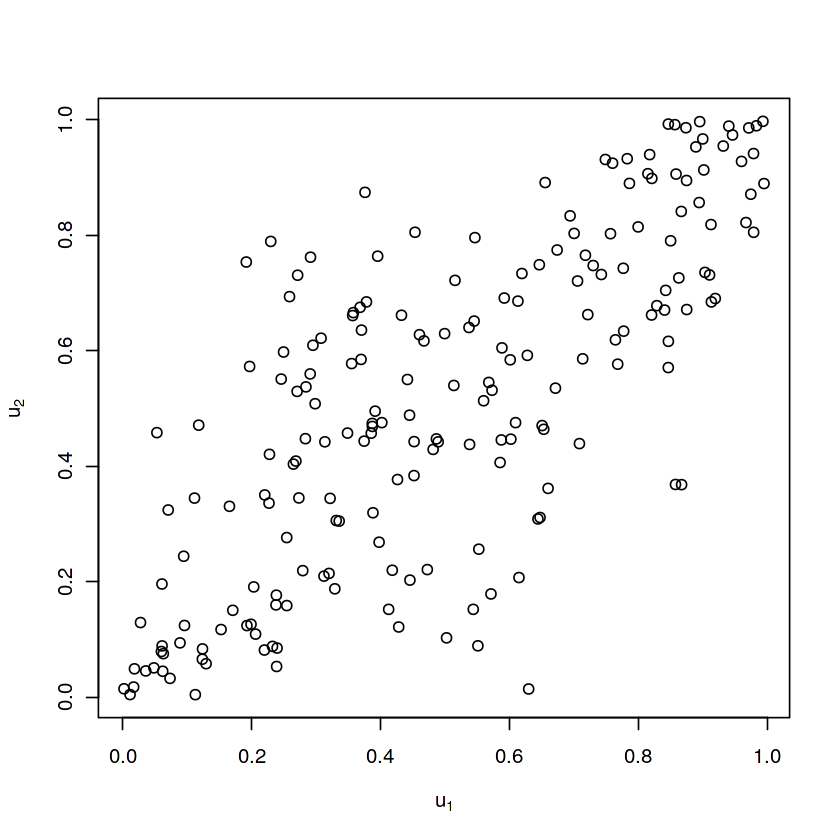

In [7]:
t.cop <- tCopula(0.8, df = 100)
v <- rCopula(200, t.cop)
plot(v, xlab=expression(u[1]), ylab = expression(u[2]))

When the tail index is high we get a picture similar to the normal distribution. There is a clear positive dependence but the tails are not particularly extremely closely clustered. We can also still see the elliptical nature of the distribution.

### 1 Degree of Freedom

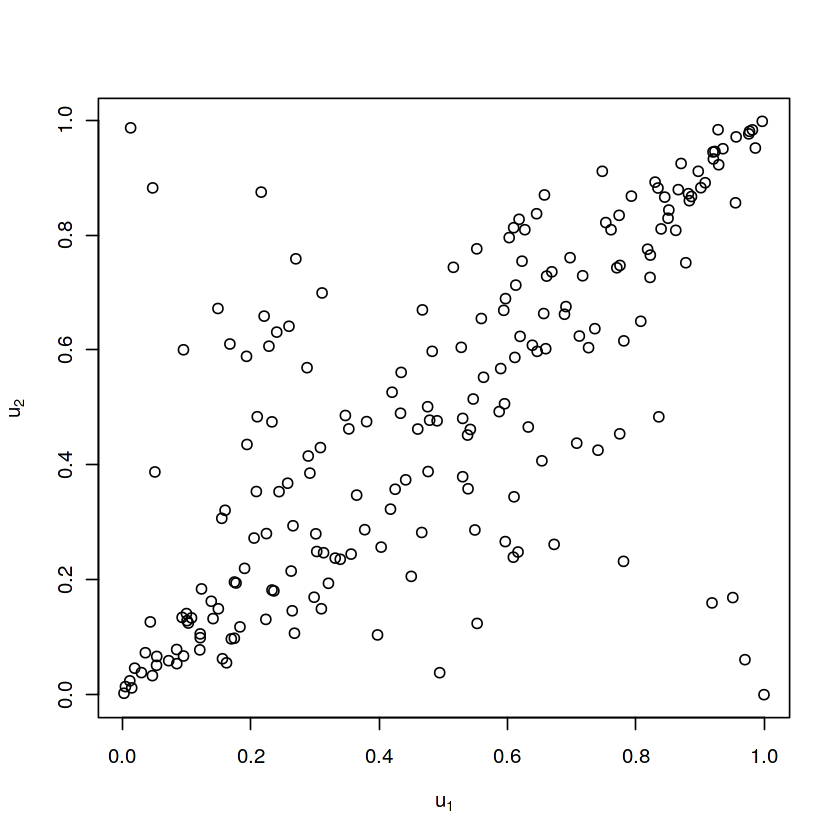

In [8]:
t.cop <- tCopula(0.8, df = 1)
v <- rCopula(200, t.cop)
plot(v, xlab = expression(u[1]), ylab = expression(u[2]))

When the tail index is very low we see strong clustering at both tails even though some points are shooting upwards and downwards from the diagonal.

This is a good fit for two assets that sometimes have strong tail dependencies but not always.

## 3. Clayton Copula

Varying the $\theta$ parameter we can show how this distribution changes

### $\theta = 2$

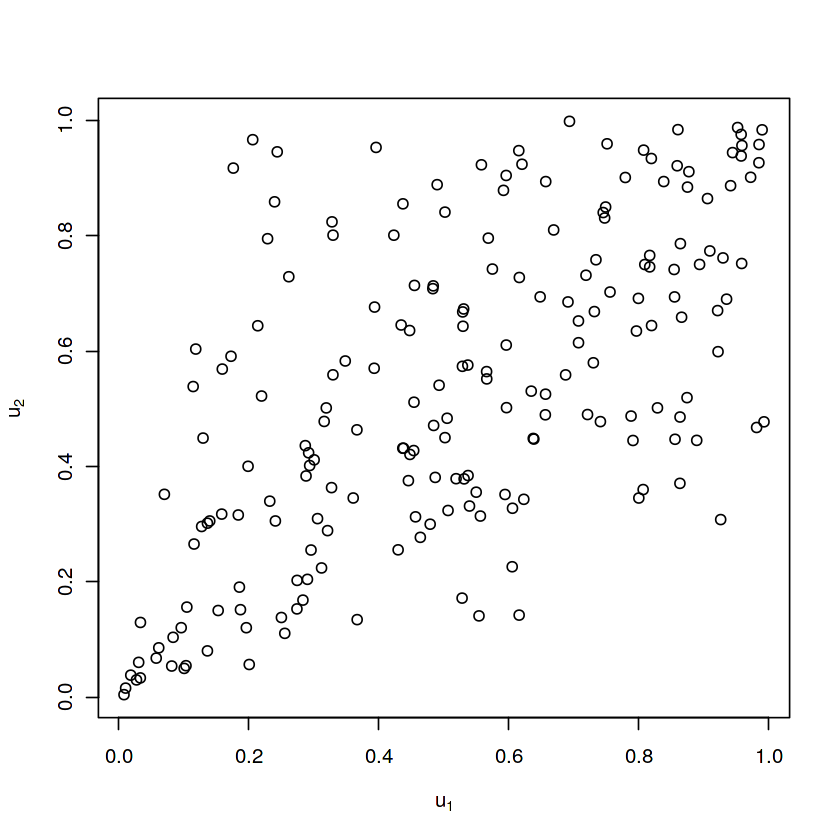

In [9]:
U <- rCopula(n = 200, copula=archmCopula(family="clayton", param = 2))
plot(U, xlab = expression(u[1]), ylab = expression(u[2]))

$\theta = 4$

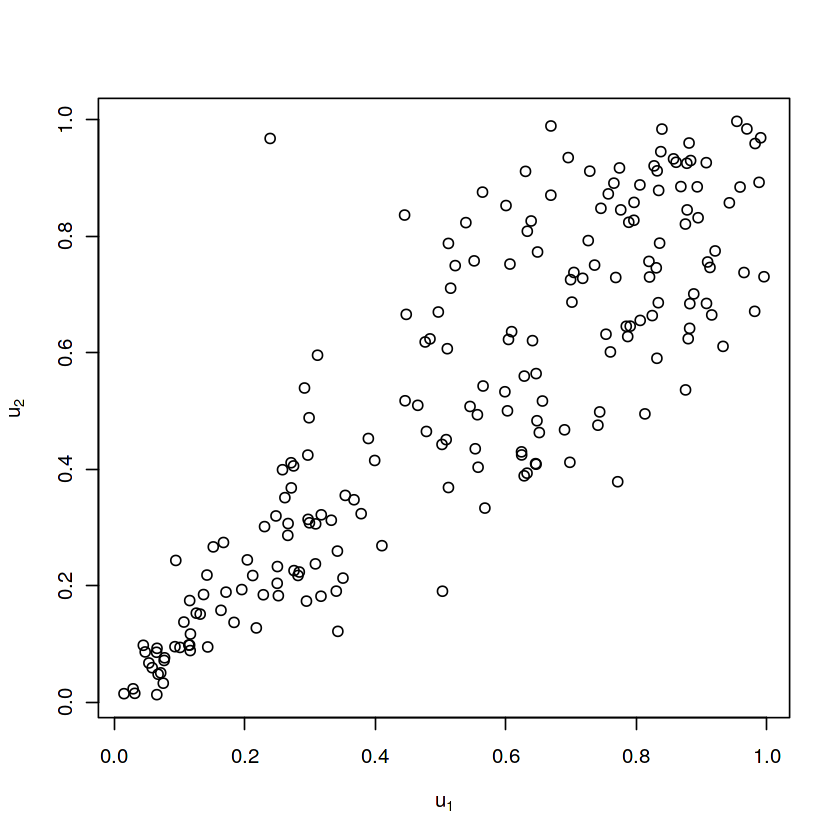

In [10]:
U <- rCopula(n = 200, copula=archmCopula(family="clayton", param = 4))
plot(U, xlab = expression(u[1]), ylab = expression(u[2]))

As we increase the $\theta$ from 2 to 4, we can clearly see the increase in lower tail dependency. However, there is no obvious change in upper tail dependency.